In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import joblib

In [32]:
print("Libraries imported")

Libraries imported


In [33]:
false=pd.read_csv(r"C:\Users\vikas\Desktop\fliprobo\Fake News Project\Fake.csv", encoding='latin-1')
true=pd.read_csv(r"C:\Users\vikas\Desktop\fliprobo\Fake News Project\True.csv", encoding='latin-1')

In [34]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [35]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [36]:
false.shape

(23481, 4)

In [37]:
true.shape

(21417, 4)

In [38]:
false['target'] = 'false'
true['target'] = 'true'

In [39]:
false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   target   23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB


In [40]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   target   21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


In [41]:
false.dtypes

title      object
text       object
subject    object
date       object
target     object
dtype: object

In [42]:
true.dtypes

title      object
text       object
subject    object
date       object
target     object
dtype: object

In [43]:
false.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [44]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [45]:
# Concatenate dataframes
data = pd.concat([false, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [47]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [48]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [49]:
# Check the data
data.head()

,title,text,subject,date,target
0,"Instead Of The Middle East, Trump Sent His Te...",Donald Trump has no real platform other than b...,News,"February 10, 2017",false
1,ANTI-JIHAD WARRIOR Pamela Gellar STRIKES BACK ...,Pamela Gellar is a badass warrior who has a kn...,left-news,"Jun 30, 2016",false
2,California lawmakers release environmental bil...,SAN FRANCISCO (Reuters) - Democratic state sen...,politicsNews,"February 23, 2017",true
3,"Trump speaks with Afghan leader, U.S. commande...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 10, 2017",true
4,U.S. farm groups oppose Trump's cuts to agricu...,CHICAGO (Reuters) - U.S. farm groups on Tuesda...,politicsNews,"May 23, 2017",true


In [50]:
# Removing the date (we won't use it for the analysis)
data.drop(['title', 'date'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   subject  44898 non-null  object
 2   target   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [51]:
data.head()

,text,subject,target
0,Donald Trump has no real platform other than b...,News,false
1,Pamela Gellar is a badass warrior who has a kn...,left-news,false
2,SAN FRANCISCO (Reuters) - Democratic state sen...,politicsNews,true
3,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true
4,CHICAGO (Reuters) - U.S. farm groups on Tuesda...,politicsNews,true


## Data Visualization


<AxesSubplot:xlabel='target', ylabel='count'>

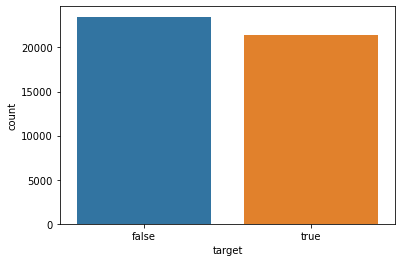

In [52]:
sns.countplot(data=data, x='target', order=data['target'].value_counts().index)

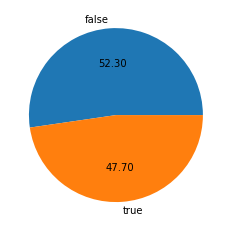

In [53]:
plt.pie(data['target'].value_counts(), labels =['false', 'true'], autopct= "%.02f")
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


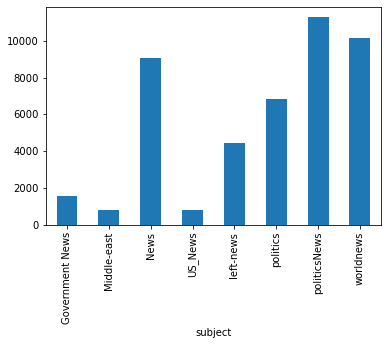

In [54]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
false    23481
true     21417
Name: text, dtype: int64


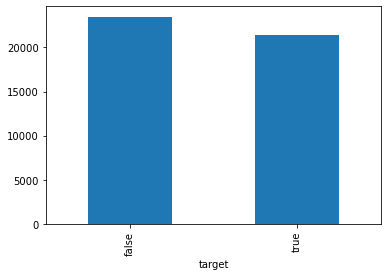

In [55]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

## now converting "target" data into binary data i.e.,fake for 0 and true for 1

In [56]:
data['target'] = data.target.map({'false':0, 'true':1})
data.head()

,text,subject,target
0,Donald Trump has no real platform other than b...,News,0
1,Pamela Gellar is a badass warrior who has a kn...,left-news,0
2,SAN FRANCISCO (Reuters) - Democratic state sen...,politicsNews,1
3,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1
4,CHICAGO (Reuters) - U.S. farm groups on Tuesda...,politicsNews,1


## dropping "subject" column

In [57]:
data.drop(['subject'], axis=1, inplace=True)

In [58]:
data.head()

,text,target
0,Donald Trump has no real platform other than b...,0
1,Pamela Gellar is a badass warrior who has a kn...,0
2,SAN FRANCISCO (Reuters) - Democratic state sen...,1
3,WASHINGTON (Reuters) - U.S. President Donald T...,1
4,CHICAGO (Reuters) - U.S. farm groups on Tuesda...,1


## Pre-Processing

### Convert to lowercase

In [59]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,target
0,donald trump has no real platform other than b...,0
1,pamela gellar is a badass warrior who has a kn...,0
2,san francisco (reuters) - democratic state sen...,1
3,washington (reuters) - u.s. president donald t...,1
4,chicago (reuters) - u.s. farm groups on tuesda...,1


### creating coloumn which will contain the numbers of characters

In [60]:
data['length'] = data['text'].str.len()
data.head()

,text,target,length
0,donald trump has no real platform other than b...,0,2665
1,pamela gellar is a badass warrior who has a kn...,0,2117
2,san francisco (reuters) - democratic state sen...,1,2595
3,washington (reuters) - u.s. president donald t...,1,3061
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655


### creating coloumn which will fetch numbers of words

In [61]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,text,target,length,num_words
0,donald trump has no real platform other than b...,0,2665,501
1,pamela gellar is a badass warrior who has a kn...,0,2117,399
2,san francisco (reuters) - democratic state sen...,1,2595,442
3,washington (reuters) - u.s. president donald t...,1,3061,517
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655,447


### creating coloumn which will fetch numbers of sentences 

In [62]:
data['num_sent'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,text,target,length,num_words,num_sent
0,donald trump has no real platform other than b...,0,2665,501,16
1,pamela gellar is a badass warrior who has a kn...,0,2117,399,8
2,san francisco (reuters) - democratic state sen...,1,2595,442,13
3,washington (reuters) - u.s. president donald t...,1,3061,517,16
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655,447,13


In [63]:
# Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [65]:
#Replacing '\n' in message
data['text'] = data['text'].replace('\n',' ')

In [66]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [67]:
data["clean_comments"] = data['text'].apply(clean_comments)

In [70]:
data

,text,target,length,num_words,num_sent,clean_comments
0,donald trump has no real platform other than b...,0,2665,501,16,donald trump real platform afraid afraid trump...
1,pamela gellar is a badass warrior who has a kn...,0,2117,399,8,pamela gellar badass warrior knack exposing tr...
2,san francisco (reuters) - democratic state sen...,1,2595,442,13,san francisco reuters democratic state senator...
3,washington (reuters) - u.s. president donald t...,1,3061,517,16,washington reuters u president donald trump af...
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655,447,13,chicago reuters u farm group tuesday pushed ba...
...,...,...,...,...,...,...
44893,wow! this is one of the most powerful speeches...,0,1396,270,7,wow one powerful speech ever watch hispanic am...
44894,may 7th is likely going to be a day of clashes...,0,7155,1300,40,may th likely going day clash protester coming...
44895,madrid (reuters) - dismissed catalan leader ca...,1,3196,550,18,madrid reuters dismissed catalan leader carles...
44896,well that didn t take long in the trains betwe...,0,742,127,3,well take long train leipzig chemnitz mrb sett...


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            44898 non-null  object
 1   target          44898 non-null  int64 
 2   length          44898 non-null  int64 
 3   num_words       44898 non-null  int64 
 4   num_sent        44898 non-null  int64 
 5   clean_comments  44898 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


In [72]:
data['clean_length'] = data['clean_comments'].map(lambda clean_comments: len(clean_comments))
data.head()

,text,target,length,num_words,num_sent,clean_comments,clean_length
0,donald trump has no real platform other than b...,0,2665,501,16,donald trump real platform afraid afraid trump...,1750
1,pamela gellar is a badass warrior who has a kn...,0,2117,399,8,pamela gellar badass warrior knack exposing tr...,1435
2,san francisco (reuters) - democratic state sen...,1,2595,442,13,san francisco reuters democratic state senator...,1865
3,washington (reuters) - u.s. president donald t...,1,3061,517,16,washington reuters u president donald trump af...,2172
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655,447,13,chicago reuters u farm group tuesday pushed ba...,1955


In [73]:
data.shape

(44898, 7)

In [75]:
print("Original Length:",data.length.sum())
print("Cleaned Length:", data.clean_length.sum())
print("Total Words Removed:", (data.length.sum()) - (data.clean_length.sum()))

Original Length: 111226042
Cleaned Length: 73400072
Total Words Removed: 37825970


In [76]:
comment_len = data.clean_comments.str.len()
data.clean_comments.str.len().mean()

1634.8182992560917

<AxesSubplot:xlabel='length', ylabel='Count'>

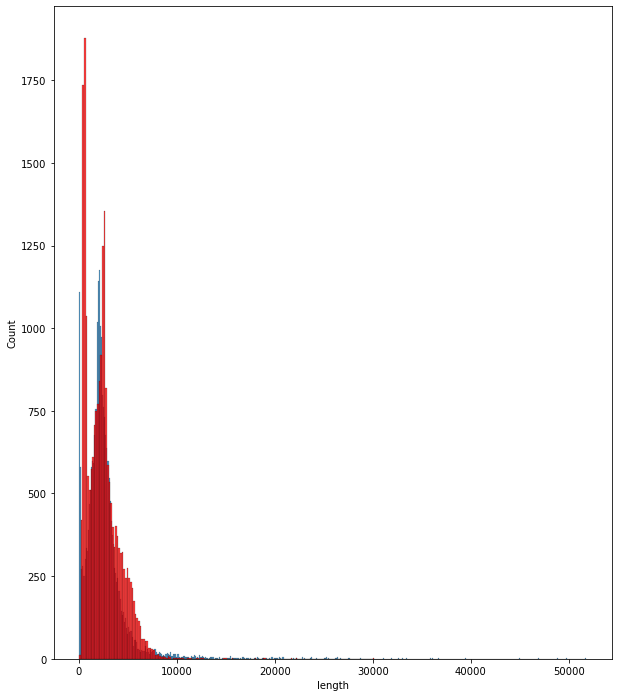

In [78]:
plt.figure(figsize=(10,12))
sns.histplot(data[data['target']==0]['length'])
sns.histplot(data[data['target']==1]['length'],color = 'red')

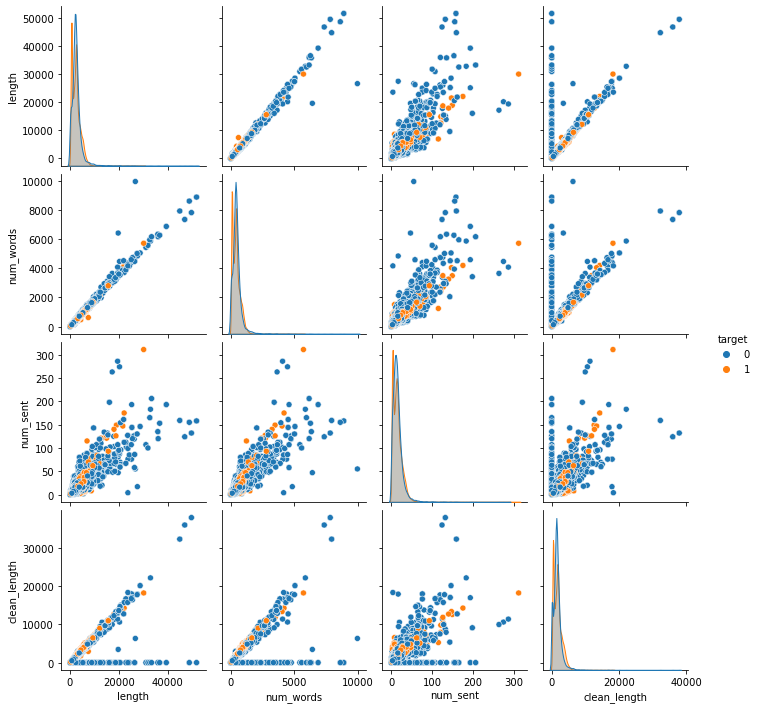

In [79]:
sns.pairplot(data, hue = 'target')

In [80]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

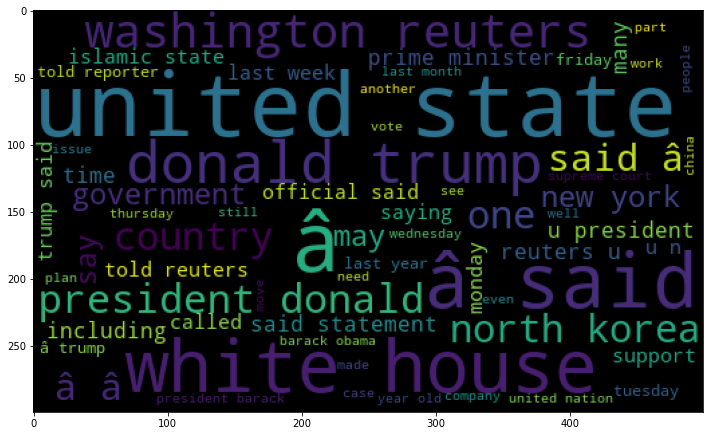

In [81]:

spam_wordcloud = wc.generate(data[data['target']==1]['clean_comments'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()

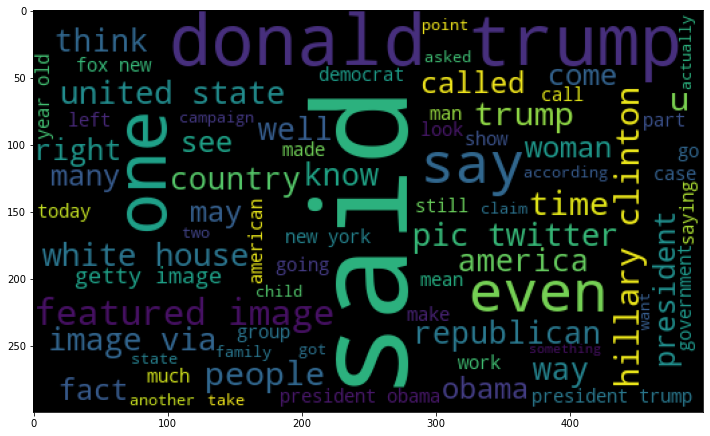

In [82]:

ham_wordcloud = wc.generate(data[data['target']==0]['clean_comments'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()

In [83]:
data.head()

,text,target,length,num_words,num_sent,clean_comments,clean_length
0,donald trump has no real platform other than b...,0,2665,501,16,donald trump real platform afraid afraid trump...,1750
1,pamela gellar is a badass warrior who has a kn...,0,2117,399,8,pamela gellar badass warrior knack exposing tr...,1435
2,san francisco (reuters) - democratic state sen...,1,2595,442,13,san francisco reuters democratic state senator...,1865
3,washington (reuters) - u.s. president donald t...,1,3061,517,16,washington reuters u president donald trump af...,2172
4,chicago (reuters) - u.s. farm groups on tuesda...,1,2655,447,13,chicago reuters u farm group tuesday pushed ba...,1955


# Defining dependent and independent variables


In [85]:
x = data["clean_comments"]
y = data["target"]

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
#Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data["clean_comments"])
x = features
y=data["target"]

# Creating Model

## Peparing the data


In [94]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [95]:
x.shape, y.shape

((44898, 10000), (44898,))

In [96]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((31428, 10000), (31428,), (13470, 10000), (13470,))

# 1. Logistic Regression

In [97]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.9880475129918337
confusion_matrix: 
 [[6953   95]
 [  66 6356]]
classification_report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7048
           1       0.99      0.99      0.99      6422

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



## Confusion Matrix for Logistic Regression

Confusion matrix, without normalization


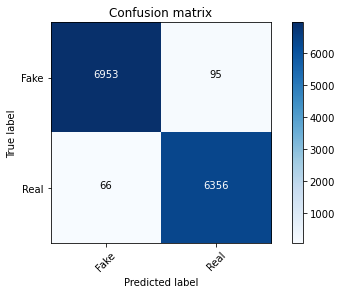

In [98]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Cross Validation Score for Logistic Regression

In [99]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.9888858933651422


# 2.Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

NB_classifier.fit(x_train,y_train)
pred_nb=NB_classifier.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_nb))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_nb))
print("classification_report: \n", classification_report(y_test,pred_nb))

accuracy_score:  0.9489977728285078
confusion_matrix: 
 [[6654  394]
 [ 293 6129]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7048
           1       0.94      0.95      0.95      6422

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



## Confusion Matrix for Naive Bayes

Confusion matrix, without normalization


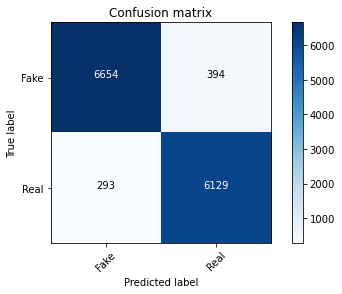

In [101]:
cm = metrics.confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Cross Validation Score for Naive Bayes

In [102]:
print('CV score for Naive Bayes: ',cross_val_score(NB_classifier,x,y,cv=5).mean())

CV score for Naive Bayes:  0.9507771809054087


# 3.DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion= 'entropy',max_depth = 20, splitter='best', random_state=42)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_dtc))
print("classification_report: \n", classification_report(y_test,pred_dtc))

accuracy_score:  0.9956941351150705
confusion_matrix: 
 [[7018   30]
 [  28 6394]]
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7048
           1       1.00      1.00      1.00      6422

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



## Confusion Matrix for DecisionTreeClassifier

Confusion matrix, without normalization


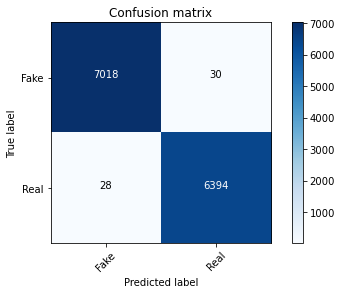

In [104]:
cm = metrics.confusion_matrix(y_test, pred_dtc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Cross Validation Score for DecisionTreeClassifier

In [105]:
print('CV score forDecisionTreeClassifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score forDecisionTreeClassifier:  0.9961468420127041


# 4. RandomForestClassifier


In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50, criterion="entropy")
rfc.fit(x_train,y_train)
pred_rfc=dtc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_rfc))
print("classification_report: \n", classification_report(y_test,pred_rfc))

accuracy_score:  0.9956941351150705
confusion_matrix: 
 [[7018   30]
 [  28 6394]]
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7048
           1       1.00      1.00      1.00      6422

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



## Confusion Matrix for RandomForestClassifier

Confusion matrix, without normalization


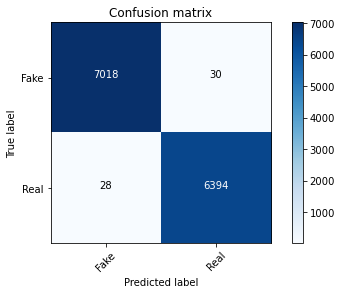

In [107]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Cross Validation Score for RandomForestClassifier

In [108]:
print('CV score for RandomForestClassifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for RandomForestClassifier:  0.997171350820809


# 5.LinearSVC

In [109]:
svc = LinearSVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))


accuracy_score:  0.9957683741648107
confusion_matrix: 
 [[7017   31]
 [  26 6396]]
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7048
           1       1.00      1.00      1.00      6422

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



## Confusion Matrix for LinearSVC

Confusion matrix, without normalization


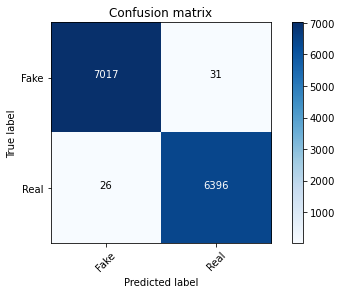

In [110]:
cm = metrics.confusion_matrix(y_test, pred_svc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Cross Validation Score for LinearSVC

In [111]:
print('CV score for LinearSVC: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for LinearSVC:  0.9955677005316289


## ROC & AUC Curve for all model

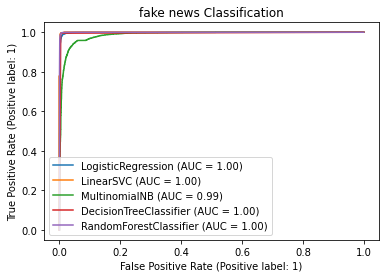

In [114]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(NB_classifier, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plt.title("fake news Classification")
plt.legend(prop={"size" :10} ,loc = 'lower left')
plt.show()

## Saving the Model

In [116]:
joblib.dump(rfc, "fake_news_Detection_Classifier.pkl")

['fake_news_Detection_Classifier.pkl']

## Checking predicted and original values

In [117]:
Model = joblib.load("fake_news_Detection_Classifier.pkl")
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
fake_news_Detection_Classifier = pd.DataFrame()
fake_news_Detection_Classifier['Predicted fake Messages Detection'] = prediction
fake_news_Detection_Classifier['Actual fake Messages Detection'] = y
fake_news_Detection_Classifier


,Predicted Spam Messages Detection,Actual Spam Messages Detection
0,1,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
13465,0,0
13466,0,1
13467,0,1
13468,0,0


# Converting the dataframe into CSV format and saving it


In [118]:
fake_news_Detection_Classifier.to_csv('fake_news_Detection_Classifier.csv', index=False)